# Mushroom Classification

Dataset link : https://www.kaggle.com/datasets/uciml/mushroom-classification

### 📄 Deskripsi Dataset:
- Jumlah data: 8.124 jamur
- Jumlah fitur: 22 fitur kategorikal
- Target (label): edible (e) atau poisonous (p)

## Import Library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

## Load Data

In [5]:
df = pd.read_csv('mushrooms.csv')

# Cek dataframe
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [6]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# Cek jumlah baris dan kolom
df.shape

(8124, 23)

In [8]:
# Cek missing value
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [9]:
# Cek duplikasi
df.duplicated().sum()

np.int64(0)

## Data Visualization

In [10]:
# Semua mapping disusun dalam satu dict per kolom
mappings = {
    'class': {'e': 'edible', 'p': 'poisonous'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink',
                  'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty',
             'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray',
                   'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs',
                   'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
                                'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
                                'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none',
                  'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green',
                          'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous',
                   's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths',
                'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Salin dataframe original ke dataframe readable
df_readable = df.copy()

# Apply mapping ke semua kolom
for column, mapping in mappings.items():
    df_readable[column] = df_readable[column].map(mapping)

# Lihat hasil
print(df_readable.head())

       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2             

<ipython-input-11-6fb76858726e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_readable, x='class', palette='Set2')


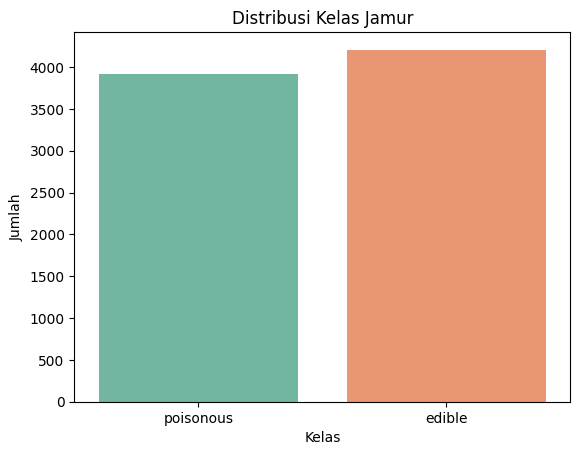

In [11]:
# Distribusi kelas target
sns.countplot(data=df_readable, x='class', palette='Set2')
plt.title('Distribusi Kelas Jamur')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

In [12]:
# Encode dataset
encoders = {}
le = LabelEncoder()

# Encode semua kolom
df_encoded = df_readable.copy()

for col in df.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    encoders[col] = le

# Lihat hasil encoding
df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


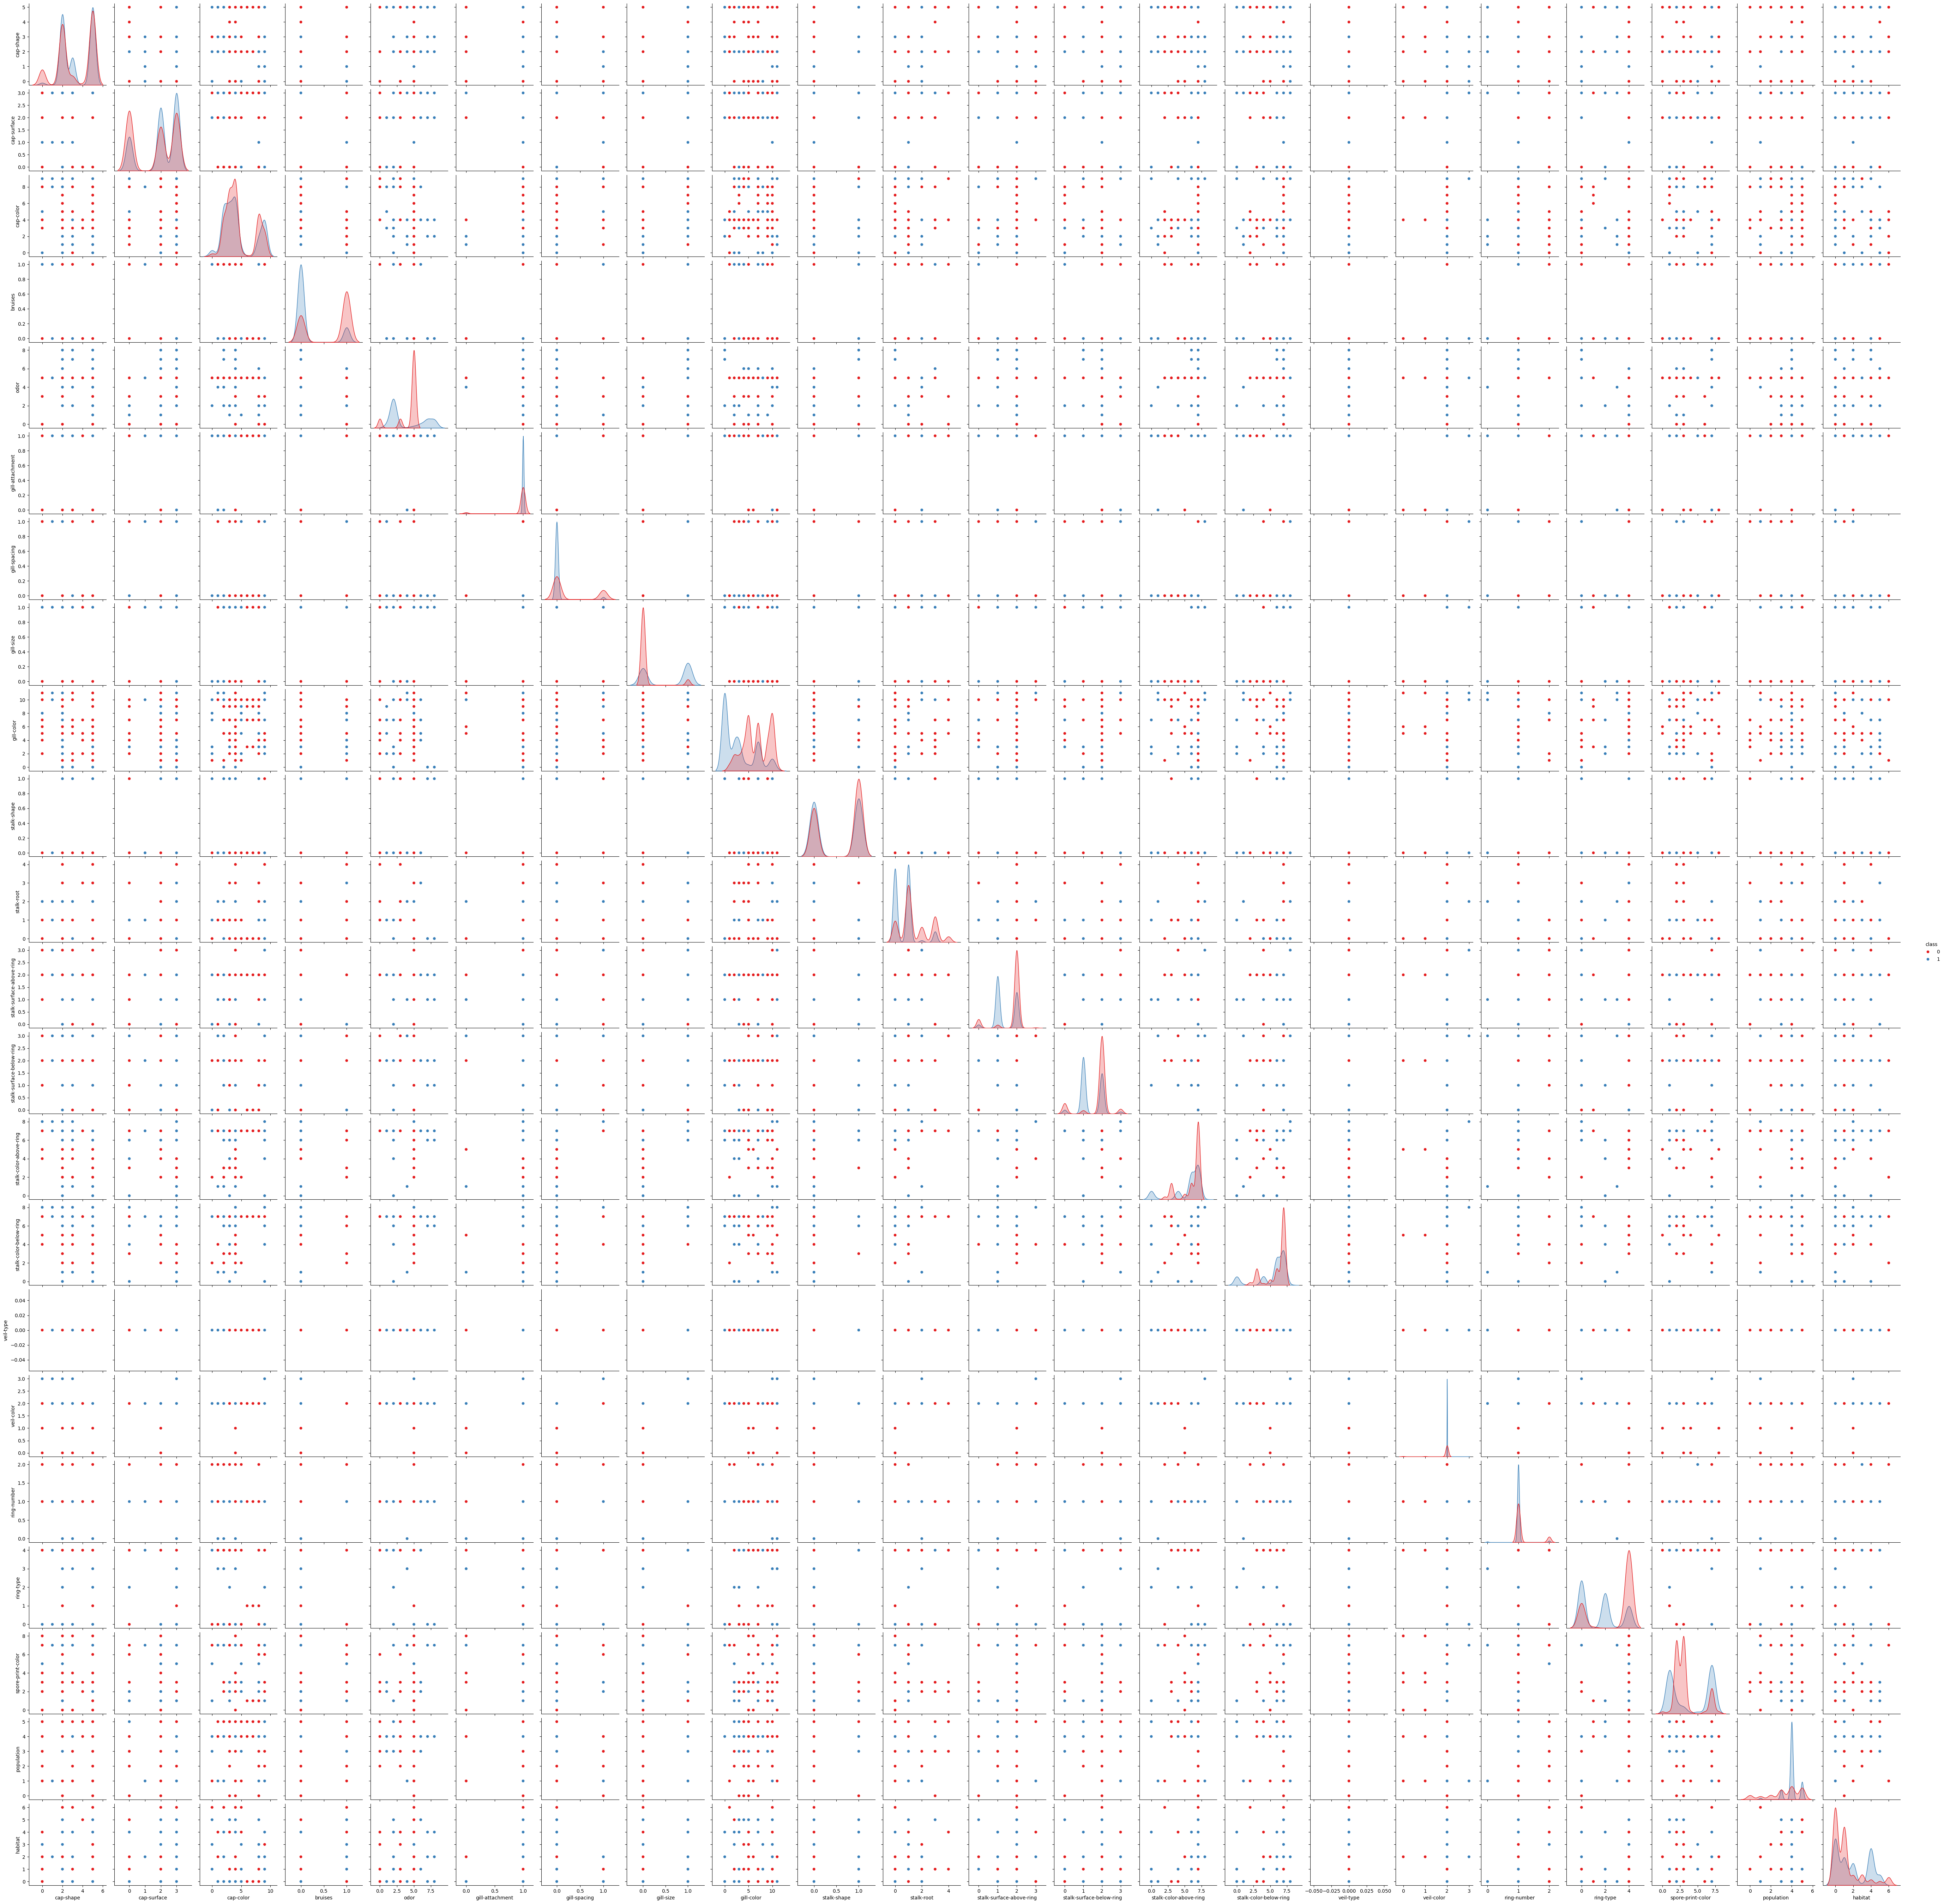

In [13]:
# Visualisasi data dengan Grafik pada data
sns.pairplot(df_encoded,hue='class',palette='Set1')

## Data Splitting

In [14]:
# Split data 70:30
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training

In [15]:
# Train model dengan Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Train model
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

## Classification Report

In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Model Evaluation

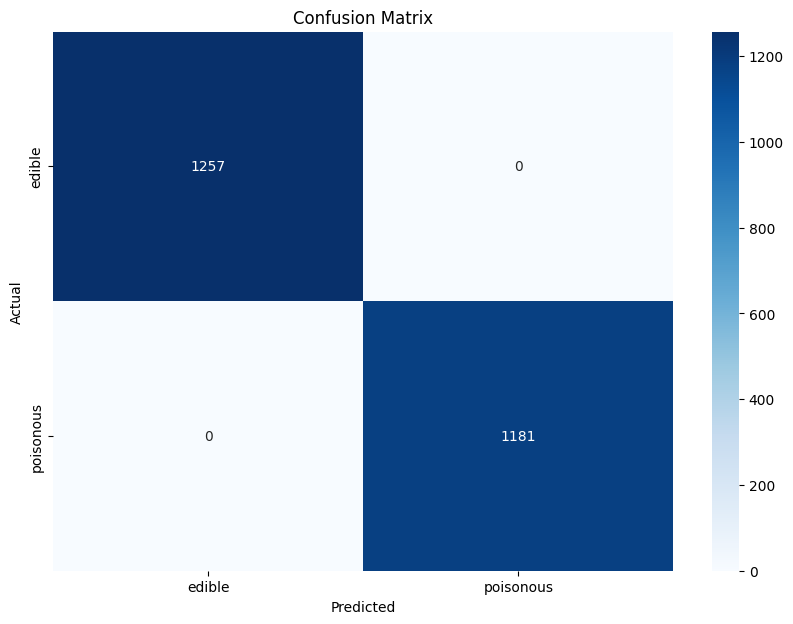

In [17]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree Visualization

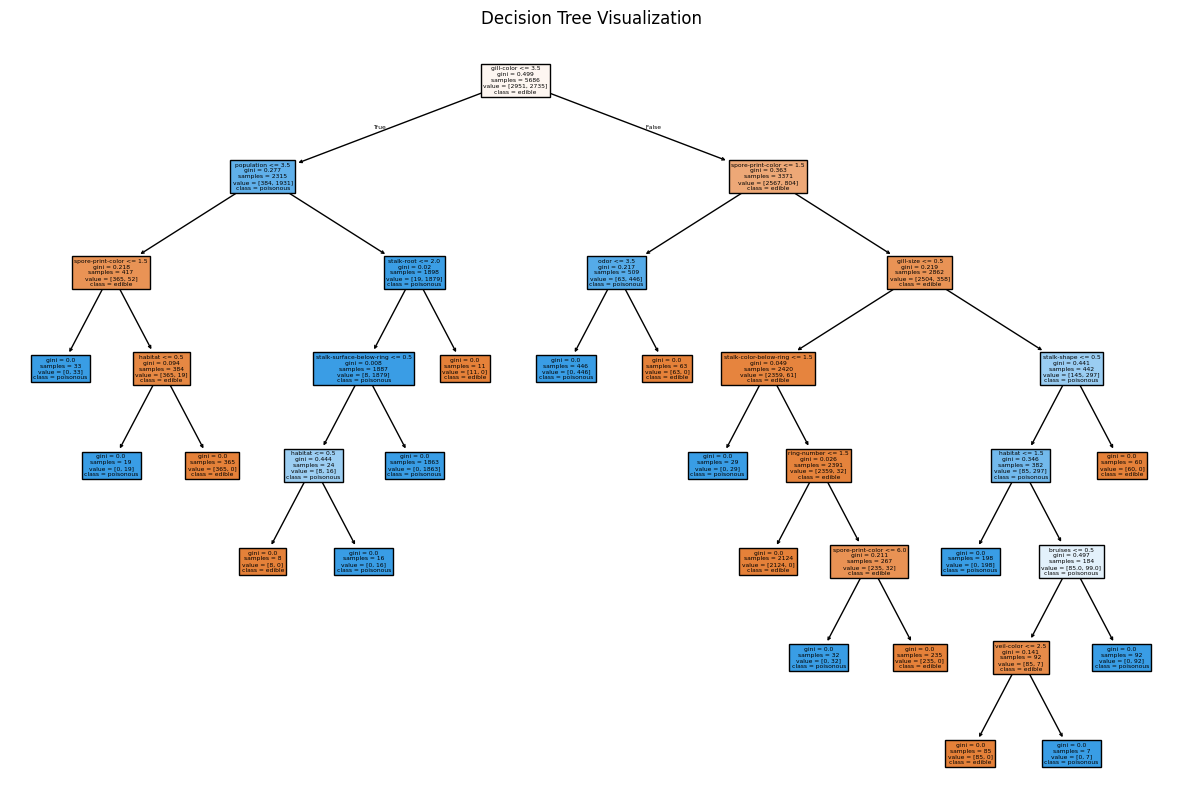

In [18]:
# features in data
features = df_encoded.columns.tolist()
features.remove('class')

# Visualisasi Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=features, class_names=['edible', 'poisonous'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

## Test the model with new sample

In [22]:
# Example of creating a single Mushroom data point as a dictionary
example_mushroom = {
    'cap-shape': 'b',  # bell
    'cap-surface': 's',  # smooth
    'cap-color': 'n',  # brown
    'bruises': 'f',  # no
    'odor': 'n',  # none
    'gill-attachment': 'a',  # attached
    'gill-spacing': 'c',  # close
    'gill-size': 'b',  # broad
    'gill-color': 'n',  # brown
    'stalk-shape': 'e',  # enlarging
    'stalk-root': 'b',  # bulbous
    'stalk-surface-above-ring': 's',  # smooth
    'stalk-surface-below-ring': 's',  # smooth
    'stalk-color-above-ring': 'n',  # brown
    'stalk-color-below-ring': 'n',  # brown
    'veil-type': 'p',  # partial
    'veil-color': 'w',  # white
    'ring-number': 'n',  # none
    'ring-type': 'n',  # none
    'spore-print-color': 'n',  # brown
    'population': 'n',  # numerous
    'habitat': 'd'  # woods
}


# Urutkan fitur sesuai training
example_mushroom = {key: example_mushroom[key] for key in features}

# Encode tiap fitur pakai LabelEncoder yang sesuai
example_mushroom_encoded = {}
for key, value in example_mushroom.items():
    le = encoders[key]
    example_mushroom_encoded[key] = le.transform([value])[0]

# Ubah ke DataFrame
example_mushroom_df = pd.DataFrame([example_mushroom_encoded])

# Prediksi kelas
prediction = model.predict(example_mushroom_df)

# Decode hasil prediksi dari angka ke string
predicted_class = encoders['class'].inverse_transform(prediction)[0]

# Mapping hasil prediksi ke deskripsi
class_description = {'e': 'Edible 🍄', 'p': 'Poisonous ☠️'}

# Tampilkan hasil dengan penjelasan
print(f"The predicted class for the example mushroom is: {predicted_class} → {class_description[predicted_class]}")

The predicted class for the example mushroom is: e → Edible 🍄
